# Comparison of neighborhoods of New York City and the city of Toronto 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Collecting data of Newyork

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
neighborhoods.shape

(306, 4)

In [10]:
Borough_in_newyork=neighborhoods['Borough'].unique()
print("There are total {} Borough in newyork".format(Borough_in_newyork))


There are total ['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island'] Borough in newyork


##### There are total 5 Borough in newyork

In [11]:
Neighborhood_in_newyork=neighborhoods['Neighborhood'].unique()
print("There are total {} Neighborhood in newyork".format(len(Neighborhood_in_newyork)))


There are total 302 Neighborhood in newyork


In [12]:
Newyork_Data=neighborhoods

### Collecting data of Toronto

In [13]:
from bs4 import BeautifulSoup

In [14]:
link='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
url=requests.get(link).text
table=BeautifulSoup(url,'lxml').find('tbody')
df=[]#blank list to append data
for r in table.find_all('tr'):#finding all rows and loop for each row
    all_columns=r.find_all('td')#columns in each row
    strip_columns=[i.text.strip() for i in all_columns]
    df.append(strip_columns)
df=pd.DataFrame(df)   
    

In [15]:
df.head()

,0,1,2
0,None,None,None
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


#### Cleaning and preproceesing of Toronto Data

In [16]:
df=df[1:]
df.columns=['PostalCode','Borough','Neighborhood']
df.head()

,PostalCode,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront


In [17]:
df1=df.drop((df[df['Borough']=='Not assigned']).index)

In [18]:
df2=df1.set_index(['PostalCode','Borough'])
df2=df2.groupby(['PostalCode','Borough']).agg(','.join)
df_final=df2.reset_index()
df_final.head(10)

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [19]:
df_final.shape

(103, 3)

#### Now attaching lattitudes and longitudes of Borough of Toronto

#### Using geocoder package for latitudes and longitudes

In [20]:
geo_data=pd.read_csv('Geospatial_Coordinates.csv')

In [21]:
for i in df_final['PostalCode']:
    q=geo_data['Latitude'][geo_data['Postal Code']==i]
    df_final.loc[(df_final['PostalCode']==i),'Latitude']=q.values
    r=geo_data['Longitude'][geo_data['Postal Code']==i]
    df_final.loc[(df_final['PostalCode']==i),'Longitude']=r.values
    
df_final.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


In [22]:
print('The Toronto has {} boroughs and {} neighborhoods.'.format(
        len(df_final['Borough'].unique()),
        df_final.shape[0]
    )
)

The Toronto has 11 boroughs and 103 neighborhoods.


In [23]:
Toronto_data=df_final

In [24]:
df_final.columns

Index(['PostalCode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude'], dtype='object')

## I will use each borough of both countries for analysis

In [25]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


#### using forsquare api to get venues

In [1]:
CLIENT_ID = '###########' # your Foursquare ID   #### I have removed ID and Password
CLIENT_SECRET = '###################' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ###########
CLIENT_SECRET:###################


### We have data of two cities now we will get 100 venues which are present with in a 500 meters radius of neighborhoods

In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

In [28]:
def getNearbyVenues(Brough_names,names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for Borough_name, name, lat, lng in zip(Brough_names,names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(Borough_name,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
Toronto_venues = getNearbyVenues(Brough_names=Toronto_data['Borough'],names=Toronto_data['Neighborhood'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )

Rouge,Malvern
Highland Creek,Rouge Hill,Port Union
Guildwood,Morningside,West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park,Ionview,Kennedy Park
Clairlea,Golden Mile,Oakridge
Cliffcrest,Cliffside,Scarborough Village West
Birch Cliff,Cliffside West
Dorset Park,Scarborough Town Centre,Wexford Heights
Maryvale,Wexford
Agincourt
Clarks Corners,Sullivan,Tam O'Shanter
Agincourt North,L'Amoreaux East,Milliken,Steeles East
L'Amoreaux West,Steeles West
Upper Rouge
Hillcrest Village
Fairview,Henry Farm,Oriole
Bayview Village
Silver Hills,York Mills
Newtonbrook,Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park,Don Mills South
Bathurst Manor,Downsview North,Wilson Heights
Northwood Park,York University
CFB Toronto,Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens,Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West,Riverdale
The Beac

In [30]:
Newyork_venues = getNearbyVenues(Brough_names=Newyork_Data['Borough'],names=Newyork_Data['Neighborhood'],
                                   latitudes=Newyork_Data['Latitude'],
                                   longitudes=Newyork_Data['Longitude']
                                  )


Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

## Now we have venue detail of both countries and we can start our analysis

In [31]:
print(Newyork_venues.shape)
Newyork_venues.head()

(20551, 8)


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Bronx,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
2,Bronx,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant
3,Bronx,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant
4,Bronx,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy


In [216]:
print(Toronto_venues.shape)
Toronto_venues.head()

(4842, 8)


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Scarborough,"Rouge,Malvern",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa
1,Scarborough,"Rouge,Malvern",43.806686,-79.194353,Caribbean Wave,43.798558,-79.195777,Caribbean Restaurant
2,Scarborough,"Rouge,Malvern",43.806686,-79.194353,Staples Morningside,43.800285,-79.196607,Paper / Office Supplies Store
3,Scarborough,"Rouge,Malvern",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
4,Scarborough,"Rouge,Malvern",43.806686,-79.194353,Harvey's,43.800106,-79.198258,Fast Food Restaurant


##### Total venues in Newyork  (while we consider limit 100)=20590 
##### Total venues in Toronto  (while we consider limit 100)=4849
###### from above results it seems that number of venues in few neighborhoods of Toronto is less than 100 in 500 meter range same with Newyork 
###### according to number of neighborhoods in each country it should be Newrok: 30600 and Toronto:10300 (Because neighborhoods in Newyork are 306 and in Toronto 103

#### let us check total number of venues in each neighbor hood of Newyork

In [33]:
Newyork_grouped=Newyork_venues.groupby('Neighborhood').count()

In [34]:
Newyork_grouped_sorted=Newyork_grouped.sort_values('Venue Category')
Newyork_grouped_sorted.head()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Todt Hill,4,4,4,4,4,4,4
Port Ivory,5,5,5,5,5,5,5
Breezy Point,5,5,5,5,5,5,5
Clason Point,5,5,5,5,5,5,5
Howland Hook,7,7,7,7,7,7,7


#### let us check how many neighborhoods are in Newyork where Number of venues are less than 50

In [35]:
Newyork_lessthan_50_neigh=Newyork_grouped_sorted[Newyork_grouped_sorted['Venue Category']<50]
Newyork_lessthan_50_neigh.shape

(96, 7)

#### let us check how many neighborhoods are in Toronto where Number of venues are less than 50

In [36]:
Toronto_venues_grouped=Toronto_venues.groupby('Neighborhood').count() ## Total nymber of venues in each neighborhood of TOronto

In [37]:
Toronto_grouped_sorted=Toronto_venues_grouped.sort_values('Venue Category')
Toronto_grouped_sorted.head()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
"Silver Hills,York Mills",4,4,4,4,4,4,4
Northwest,4,4,4,4,4,4,4
Downsview Central,4,4,4,4,4,4,4
"Highland Creek,Rouge Hill,Port Union",4,4,4,4,4,4,4
Downsview West,5,5,5,5,5,5,5


In [38]:
Toronto_lessthan_50_neigh=Toronto_grouped_sorted[Toronto_grouped_sorted['Venue Category']<50]
Toronto_lessthan_50_neigh.shape

(64, 7)

#### percentage of neighborhoods in both countries where number of venues is less than 50

In [39]:
percent_newyork_l_50=(Newyork_lessthan_50_neigh.shape[0]/Newyork_Data.shape[0])*100
percent_Toronto_l_50=(Toronto_lessthan_50_neigh.shape[0]/Toronto_data.shape[0])*100
print('percent_newyork_l_50:',percent_newyork_l_50)
print('percent_Toronto_l_50:',percent_Toronto_l_50)

percent_newyork_l_50: 31.372549019607842
percent_Toronto_l_50: 62.13592233009708


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
df_less_50=pd.DataFrame(data={'% of neighborhhods of newyork':[percent_newyork_l_50],'% of neighborhhods of Toronto':[percent_Toronto_l_50]})
df_less_50=df_less_50.T
df_less_50

,0
% of neighborhhods of newyork,31.372549
% of neighborhhods of Toronto,62.135922


Text(0.5, 1.0, 'percentage of neighborhoods in both countries where number of venues is less than 50 within 500 meter radius')

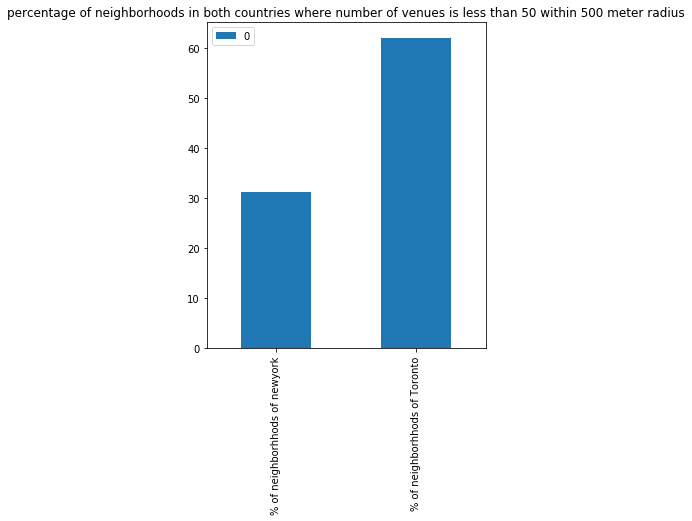

In [47]:

df_less_50.plot(kind='bar',figsize=(5,6))
plt.title('percentage of neighborhoods in both countries where number of venues is less than 50 within 500 meter radius')

## Result 1: 63% Neighborhoods of Toronto has less than 50 venues with in 500 meter radius while percentage in newyork is 30% 

### Above result meant that as compare to New york there are more small neighborhoods in Toronto

## Now I am going to analyzing  catagories of venues in each countries

In [43]:
Newyork_venues_catagories=Newyork_venues['Venue Category'].unique()
print(len(Newyork_venues_catagories))

466


In [44]:
Toronto_venues_catagories=Toronto_venues['Venue Category'].unique()
print(len(Toronto_venues_catagories))

329


#### checking venues catogories which are present in newyork but not in toronto

In [68]:
V_cat_newyork= [ i for i in Newyork_venues_catagories if i not in Toronto_venues_catagories]
len(V_cat_newyork)

172

#### checking venues catogories which are present in Toronto but not in Newyork

In [66]:
l2=set(Toronto_venues_catagories)-set(Newyork_venues_catagories)
len(l2)
#l2

35

In [62]:
l1=set(Newyork_venues_catagories)-set(Toronto_venues_catagories)
#l1

### checking variety of venues in those neighborhoods of both countries where at least 100 venues are present within 500 meter radius

In [69]:
Toront0_100_neigh=Toronto_grouped_sorted[Toronto_grouped_sorted['Venue Category']==100] ## taking count 100 since
#we have selected limit 100 so we would not get count more than 100 for each neighborhood

In [73]:
Toront0_100_neigh.head()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Stn A PO Boxes 25 The Esplanade,100,100,100,100,100,100,100
Willowdale South,100,100,100,100,100,100,100
St. James Town,100,100,100,100,100,100,100
Studio District,100,100,100,100,100,100,100
"The Annex,North Midtown,Yorkville",100,100,100,100,100,100,100


In [74]:
Toront0_100_neigh=Toront0_100_neigh.reset_index() # Reseting index so that we can find neighborhoods column


In [75]:
Toront0_100_neigh.head()

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Stn A PO Boxes 25 The Esplanade,100,100,100,100,100,100,100
1,Willowdale South,100,100,100,100,100,100,100
2,St. James Town,100,100,100,100,100,100,100
3,Studio District,100,100,100,100,100,100,100
4,"The Annex,North Midtown,Yorkville",100,100,100,100,100,100,100


In [77]:
Toront0_100_neigh_list=Toront0_100_neigh['Neighborhood']
Toront0_100_neigh_list.shape       ##This is list of neighborhoods in toronto where number of venues are atleast 100

(27,)

In [83]:
Torontodata_min_100=Toronto_venues[Toronto_venues['Neighborhood'].isin (Toront0_100_neigh_list)]  ## selecting all details of neighborhoods with venues details
Torontodata_min_100.shape

(2700, 8)

In [84]:
Torontodata_min_100.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
502,North York,Willowdale South,43.77012,-79.408493,The Keg,43.766579,-79.412131,Steakhouse
503,North York,Willowdale South,43.77012,-79.408493,The Captain's Boil,43.773255,-79.413805,Seafood Restaurant
504,North York,Willowdale South,43.77012,-79.408493,Maryam Hotel,43.766961,-79.401199,Hotel
505,North York,Willowdale South,43.77012,-79.408493,Konjiki Ramen,43.766998,-79.412222,Ramen Restaurant
506,North York,Willowdale South,43.77012,-79.408493,Starbucks,43.768192,-79.413021,Coffee Shop


#### Checking how many different types of venues are present in each Neighborhood of Toronto , this will simply define varity of venues
#### I would like to explain more about in project report

In [89]:
Unique_dict={}
for i in Toront0_100_neigh_list:
    df=Torontodata_min_100[Torontodata_min_100['Neighborhood']==i]
    unique_venues=len(df['Venue Category'].unique())
    Unique_dict[i]=unique_venues
    
print(Unique_dict)    

{'Stn A PO Boxes 25 The Esplanade': 55, 'Willowdale South': 50, 'St. James Town': 56, 'Studio District': 59, 'The Annex,North Midtown,Yorkville': 60, 'The Danforth West,Riverdale': 56, 'Adelaide,King,Richmond': 64, 'Parkdale,Roncesvalles': 61, 'Berczy Park': 58, 'Brockton,Exhibition Place,Parkdale Village': 63, 'Central Bay Street': 64, 'Chinatown,Grange Park,Kensington Market': 57, 'Christie': 58, 'Church and Wellesley': 66, 'Commerce Court,Victoria Hotel': 57, 'Davisville': 58, 'Davisville North': 58, 'Design Exchange,Toronto Dominion Centre': 58, 'East Toronto': 61, 'First Canadian Place,Underground city': 60, 'Harbord,University of Toronto': 60, 'Harbourfront East,Toronto Islands,Union Station': 58, 'High Park,The Junction South': 53, 'Little Portugal,Trinity': 56, 'Not assigned': 64, 'Ryerson,Garden District': 61, 'Harbourfront,Regent Park': 54}


### above is dictionary by which we can identify how many unique varieties of venues are in each neighborhood

### Now we will create a list  

In [155]:
List_Toronto=[]
for i in (Unique_dict.values()):
    List_Toronto.append(i)
    
List_Toronto=sorted(List_Toronto,reverse=True)
print(List_Toronto)


[66, 64, 64, 64, 63, 61, 61, 61, 60, 60, 60, 59, 58, 58, 58, 58, 58, 58, 57, 57, 56, 56, 56, 55, 54, 53, 50]


#### above is a sorted list of number of  unique venues in neighborhoods (Here we are considering only those neighborhoods of toronto where at least 100 venues are present with in 500 meter radius

### same analysis for newyork data

#### selecting neighborhoods of newyork where atleast 100 venues are present with in 500 meter radius

In [156]:
Newyork_100_neigh=Newyork_grouped_sorted[Newyork_grouped_sorted['Venue Category']==100] ## taking count 100 since
#we have selected limit 100 so we would not get count more than 100 for each neighborhood

In [157]:
Newyork_100_neigh.head()

,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Stuyvesant Town,100,100,100,100,100,100,100
South Side,100,100,100,100,100,100,100
Steinway,100,100,100,100,100,100,100
Rego Park,100,100,100,100,100,100,100
Ravenswood,100,100,100,100,100,100,100


In [160]:
Newyork_100_neigh=Newyork_100_neigh.reset_index()

In [161]:
Newyork_100_neigh_list=Newyork_100_neigh['Neighborhood']
Newyork_100_neigh_list.shape       ##This is list of neighborhoods in newyork where number of venues are atleast 100

(96,)

In [162]:
Newyork_min_100=Newyork_venues[Newyork_venues['Neighborhood'].isin (Newyork_100_neigh_list)]  ## selecting all details of neighborhoods with venues details
Newyork_min_100.shape

(9600, 8)

In [163]:
Newyork_min_100.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
284,Bronx,Kingsbridge,40.881687,-73.902818,Garden Gourmet Market,40.881350,-73.903389,Gourmet Shop
285,Bronx,Kingsbridge,40.881687,-73.902818,Leche y Miel,40.883709,-73.901606,Latin American Restaurant
286,Bronx,Kingsbridge,40.881687,-73.902818,Kingsbridge Social Club,40.884545,-73.901964,Pizza Place
287,Bronx,Kingsbridge,40.881687,-73.902818,El Malecon,40.879338,-73.904457,Caribbean Restaurant
288,Bronx,Kingsbridge,40.881687,-73.902818,Sam's Pizza,40.879435,-73.905859,Pizza Place


In [164]:
Unique_newyork_dict={}
for i in Newyork_100_neigh_list:
    df=Newyork_min_100[Newyork_min_100['Neighborhood']==i]
    unique_venues=len(df['Venue Category'].unique())
    Unique_newyork_dict[i]=unique_venues
    
print(Unique_newyork_dict)    

{'Stuyvesant Town': 61, 'South Side': 61, 'Steinway': 64, 'Rego Park': 57, 'Ravenswood': 64, 'Sunnyside Gardens': 55, 'Tribeca': 58, 'Williamsburg': 58, 'Sutton Place': 61, 'Soho': 59, 'Tudor City': 64, 'Turtle Bay': 58, 'Ridgewood': 57, 'Sheepshead Bay': 53, 'Upper East Side': 59, 'Upper West Side': 67, 'Vinegar Hill': 62, 'West Village': 50, 'Washington Heights': 63, 'Sunset Park': 51, 'Roosevelt Island': 68, 'Lefrak City': 58, 'Prospect Park South': 59, 'Clinton Hill': 64, 'Cobble Hill': 61, 'Concourse Village': 56, 'Coney Island': 57, 'Corona': 59, 'Crown Heights': 49, 'Ditmas Park': 58, 'Downtown': 65, 'Dumbo': 58, 'East Harlem': 54, 'East Village': 66, 'East Williamsburg': 56, 'Elmhurst': 43, 'Financial District': 59, 'Flatbush': 57, 'Clinton': 58, 'Queensbridge': 57, 'Civic Center': 66, 'Central Harlem': 64, 'Astoria': 53, 'Auburndale': 53, 'Battery Park City': 60, 'Bay Ridge': 57, 'Baychester': 58, 'Bayside': 60, 'Bedford Stuyvesant': 52, 'Belmont': 51, 'Bensonhurst': 49, 'Boer

### creating list for newyork same as we did for Toronto

In [165]:
List_Newyork=[]
for i in (Unique_newyork_dict.values()):
    List_Newyork.append(i)
    
List_Newyork=sorted(List_Newyork,reverse=True)
print(List_Newyork)


[70, 69, 68, 68, 67, 67, 66, 66, 66, 65, 64, 64, 64, 64, 64, 64, 63, 63, 63, 63, 62, 62, 62, 61, 61, 61, 61, 61, 61, 61, 60, 60, 60, 60, 59, 59, 59, 59, 59, 59, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, 57, 57, 56, 56, 56, 56, 56, 56, 55, 55, 55, 55, 54, 54, 53, 53, 53, 53, 52, 52, 51, 51, 50, 50, 49, 49, 49, 47, 47, 47, 45, 43, 39]


#### Now comparing frequency of unique venues in top 20 neighborhoods of both countries

In [167]:
List_Toronto_20=List_Toronto[0:20]
List_Newyork_20=List_Newyork[0:20]

### Creating data frame so that we can visulize variety of venues in nieghborhoods of both countries

In [183]:
df_plot_1=pd.DataFrame({'Toronto':List_Toronto_20,'Newyork':List_Newyork_20})

In [189]:
df_plot_1=df_plot_1
df_plot_1.head()

,Toronto,Newyork
0,66,70
1,64,69
2,64,68
3,64,68
4,63,67


Text(0, 0.5, 'Number of unique venues')

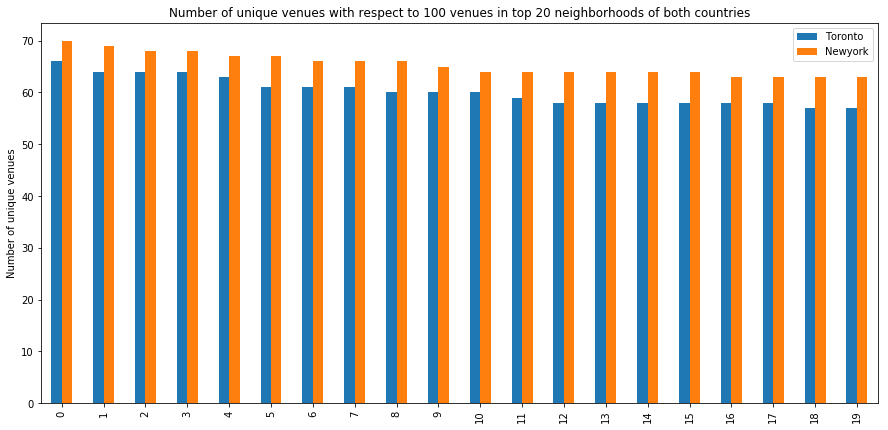

In [196]:
df_plot_1.plot(kind='bar',figsize=(15,7))
plt.title('Number of unique venues with respect to 100 venues in top 20 neighborhoods of both countries')
plt.ylabel('Number of unique venues')

### Result: From above bar graph it seems that  Neighborhoods of newyork has more variety compare to Toronto, i would like to explain more about this result on project report

## Now i will check how many clusters are required for clustering of both countries data, it will help us to understand that how neighborhoods of each countries are similar with in country

#### creating dummy variables of categories for Toronto data (we will do one hot encoding of venue category

In [222]:

Toronto_dummy = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_dummy['neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_dummy.columns[-1]] + list(Toronto_dummy.columns[:-1])
Toronto_dummy = Toronto_dummy[fixed_columns]

Toronto_dummy.head()

,neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Light Rail Station,Lighting Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,

In [229]:
Toronto_dummy.shape

(4842, 330)

### let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category of venues

In [230]:
Toronto_dummy_grp=Toronto_dummy.groupby('neighborhood').mean()

In [231]:
Toronto_dummy_grp.head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Light Rail Station,Lighting Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Pide Place,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Ski Chalet,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South America

In [232]:
Toronto_dummy_grp=Toronto_dummy_grp.reset_index()

In [234]:
Toronto_dummy_grp.shape

(102, 330)

### let's do same for New york data

In [235]:
Newyork_dummy = pd.get_dummies(Newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Newyork_dummy['neighborhood'] = Newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Newyork_dummy.columns[-1]] + list(Newyork_dummy.columns[:-1])
Newyork_dummy = Newyork_dummy[fixed_columns]

Newyork_dummy.head()

,neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,Airport Tram,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Bookstore,College Cafeteria,College Gym,College Residence Hall,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Emergency Room,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical School,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek

In [236]:
Newyork_dummy.shape

(20551, 467)

In [237]:
Newyork_dummy_grp=Newyork_dummy.groupby('neighborhood').mean()
Newyork_dummy_grp=Newyork_dummy_grp.reset_index()
Newyork_dummy_grp.shape

(302, 467)

In [238]:
Newyork_dummy_grp.head()

,neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,Airport Tram,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Bookstore,College Cafeteria,College Gym,College Residence Hall,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Emergency Room,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Medical School,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek

In [239]:
Toronto_dummy_grp_cluster=Toronto_dummy_grp.drop('neighborhood',1)  ## we will drop test column for clustering from both one hot coded data

In [240]:
Newyork_dummy_grp_cluster=Newyork_dummy_grp.drop('neighborhood',1)

### Let's start to comparing sum of squared distance in clusters of Neighborhoods of both countries

### first we will check sum of sqaured error in Toronto's data

In [262]:
K = range(1,30)
Sum_of_squared_distances = []
for k in K:
   km = KMeans(n_clusters=k)
   km = km.fit(Toronto_dummy_grp_cluster)
   Sum_of_squared_distances.append(km.inertia_)

In [263]:
Sum_of_squared_distances

[5.600422725553786,
 5.0271778709053425,
 4.667605495237995,
 4.29766935781117,
 4.063928556989758,
 3.924319035346117,
 3.7132612115766097,
 3.464138010108824,
 3.47354154445907,
 3.3068841016257235,
 3.1299459473259637,
 3.034696325666367,
 2.9794364554000947,
 2.84592304183126,
 2.7868870796677565,
 2.6850801190582634,
 2.6333811596990415,
 2.55461693011018,
 2.4604688824261007,
 2.3533214418161337,
 2.310178859579511,
 2.2082480543441454,
 2.182622946493305,
 2.0780791517111292,
 2.0504712636882383,
 1.9683653804631764,
 1.8936955045982145,
 1.8477350948014035,
 1.799115714916768]

### Let's plot line plot for finding elbow point for toronto data

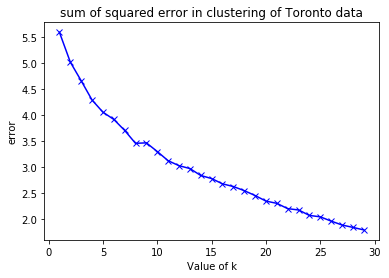

In [265]:
%matplotlib inline
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.title('sum of squared error in clustering of Toronto data')
plt.xlabel('Value of k')
plt.ylabel('error')
plt.show()

### Now checking sum of squared error in New york data

In [266]:
K = range(1,30)
Sum_of_squared_distances = []
for k in K:
   km = KMeans(n_clusters=k)
   km = km.fit(Newyork_dummy_grp_cluster)
   Sum_of_squared_distances.append(km.inertia_)

In [267]:
Sum_of_squared_distances

[9.84463984626181,
 9.22595890317946,
 8.742281656677187,
 8.379715038135265,
 8.235783997102747,
 7.841707825920693,
 7.745151824141303,
 7.5315203044395975,
 7.304057154524873,
 7.170507501901002,
 7.076130474732566,
 6.95279199603857,
 6.812458863850903,
 6.7031570190233465,
 6.48025663059621,
 6.440577971453147,
 6.250749736919398,
 6.305868262850245,
 6.06721220264445,
 6.020158207689864,
 5.890502265840022,
 5.866848146077359,
 5.7109275385668115,
 5.739563268327297,
 5.571482507664191,
 5.507471297262913,
 5.508372344473867,
 5.355313045193177,
 5.278925366056558]

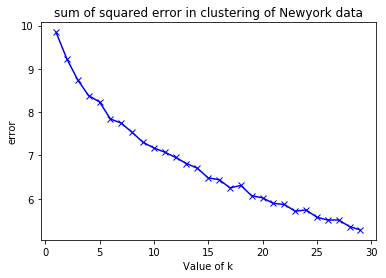

In [268]:
%matplotlib inline
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.title('sum of squared error in clustering of Newyork data')
plt.xlabel('Value of k')
plt.ylabel('error')
plt.show()

### Result: From above two graphs it is clear that if we consider all Borogh and all neighborhoods of both countries then Newyork neighborhoods have more diversity than Toronto data.
### I will explain more about this result in project report